In [113]:
import pandas as pd # shortens the name by using alias 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

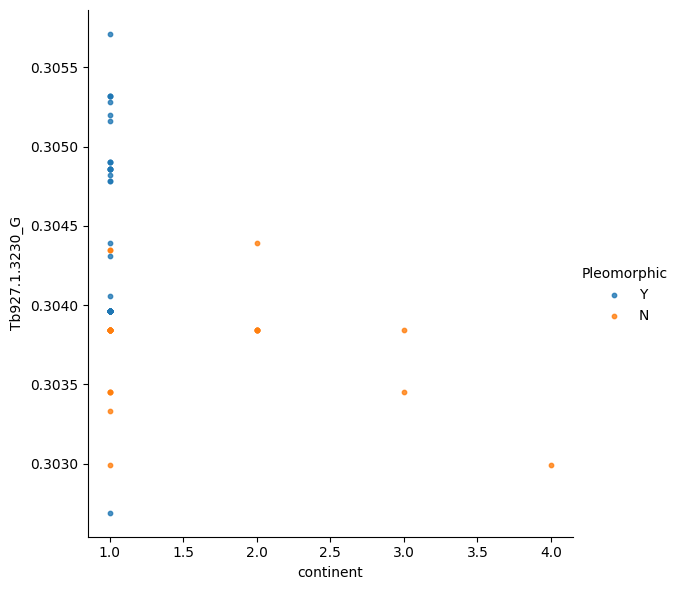

In [82]:
# open the data file
df = pd.read_csv('/Users/goldriev/mono-trac/ml/ml_input.csv', sep=",", na_values=['-'])

# convert column names to lower case
#df.columns = [c.lower() for c in df.columns]


# filter to exclude very small/large genomes and very low GC content
# this data file is full of artefacts that we don't belive
#df = df[(df['gc%'] > 20) & (df['size (mb)'] < 5000) & (df['size (mb)'] > 10)]

#df = df[['size (mb)', 'gc%', 'genes', 'group', 'subgroup']].dropna()
# show the first few lines
df.head()

sns.lmplot(
data=df,
#    data=data[data['group'] == 'Animals'],
x='continent',
y='Tb927.1.3230_G',
scatter_kws={"s": 10},
height=6,
hue='Pleomorphic',
fit_reg=False)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# scale size,gc,genes to be between 0 and 1
df[['size (mb)', 'gc%', 'genes']] = scaler.fit_transform(df[['size (mb)', 'gc%', 'genes']])
df.columns = ['size', 'gc', 'genes', 'group', 'subgroup']
df.head()

KeyError: "None of [Index(['size (mb)', 'gc%', 'genes'], dtype='object')] are in the [columns]"

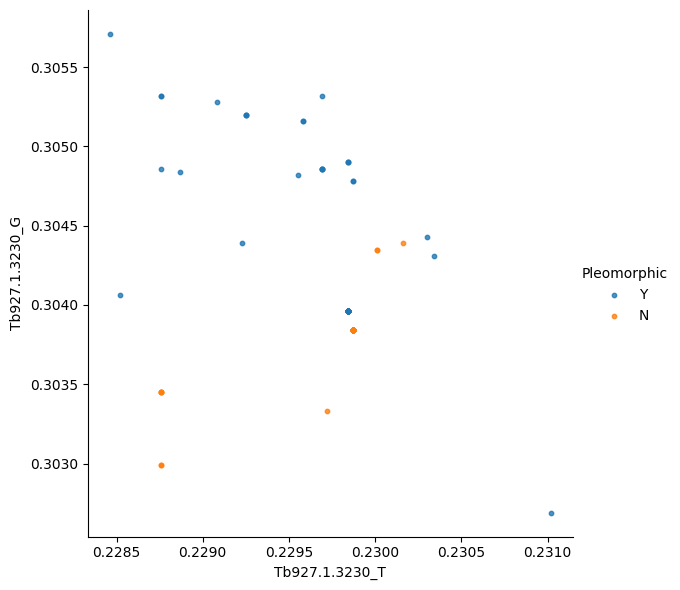

In [53]:
# select just bird, fish and mammal genomes
#my_species = df[df['subgroup'].isin(['Birds', 'Fishes', 'Mammals'])]

# look at genome size VS gc for birds/fishes/mammals
sns.lmplot(
data=df,
#    data=data[data['group'] == 'Animals'],
x='Tb927.1.3230_T',
y='Tb927.1.3230_G',
scatter_kws={"s": 10},
height=6,
hue='Pleomorphic',
fit_reg=False)

In [55]:
from sklearn import neighbors

# these are the data that the knn classifier will see
# the first two will be the input vector, the last will be the category it is trying to predict
df[['Tb927.1.3230_T', 'Tb927.1.3230_C', 'Pleomorphic']]


Tb927.1.3230_T  Tb927.1.3230_C Pleomorphic
0          0.22984         0.25455           Y
1          0.22984         0.25455           Y
2          0.22984         0.25455           Y
3          0.22987         0.25421           N
4          0.22984         0.25455           Y
..             ...             ...         ...
78         0.22876         0.25444           Y
79         0.22987         0.25421           N
80         0.22876         0.25584           N
81         0.22876         0.25444           Y
82         0.22987         0.25421           N

[83 rows x 3 columns]

In [57]:
# create a KNN classifier with 10 neighbours
clf = neighbors.KNeighborsClassifier(10)

# train it on the features and the categories
clf.fit(
    df[['Tb927.1.3230_T', 'Tb927.1.3230_C']], # these are the columns the classifier will see
    df['Pleomorphic']            # this is the column it will try to predict
)

# now we can ask it to predict the subgroup of a made up new genome
# with a genome size of 1000 mb and gc percentage of 45
clf.predict([[0.22987,0.25421]])

/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['N'], dtype=object)

In [58]:
# we can also see what it thinks the probability of each class is

# print the classes so we know what order it has them in
print(clf.classes_)

# now get the predictions
print(clf.predict_proba([[0.365, 0.45]]))

['N' 'Y']
[[0.7 0.3]]


/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [61]:
# how well does it predict the classes of the training set?
clf.score(
    df[['Tb927.1.3230_T', 'Tb927.1.3230_C']], # these are the columns the classifier will see
    df['Pleomorphic']            # this is the column it will try to predict
)

0.8795180722891566

In [62]:
# very well! but this is cheating - it has already seen the data.
# what we should do is split our data into a training and a test set

from sklearn.model_selection import train_test_split

features = df[['Tb927.1.3230_T', 'Tb927.1.3230_C']]
classes  = df['Pleomorphic']

classes

0     Y
1     Y
2     Y
3     N
4     Y
     ..
78    Y
79    N
80    N
81    Y
82    N
Name: Pleomorphic, Length: 83, dtype: object

In [63]:
# split the features and classes into 80% training, 20% test
training_features, test_features, training_classes, test_classes = train_test_split(features, classes, test_size=0.2)

len(training_features), len(test_features)

(66, 17)

In [64]:
# build a classifier with the training data
clf = neighbors.KNeighborsClassifier(10)
clf.fit(training_features, training_classes)

# use it to predict the classes of the test data
print(clf.predict(test_features))

['N' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y']


In [65]:
# how often did it get it right?
clf.score(test_features, test_classes)

0.9411764705882353

/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not 

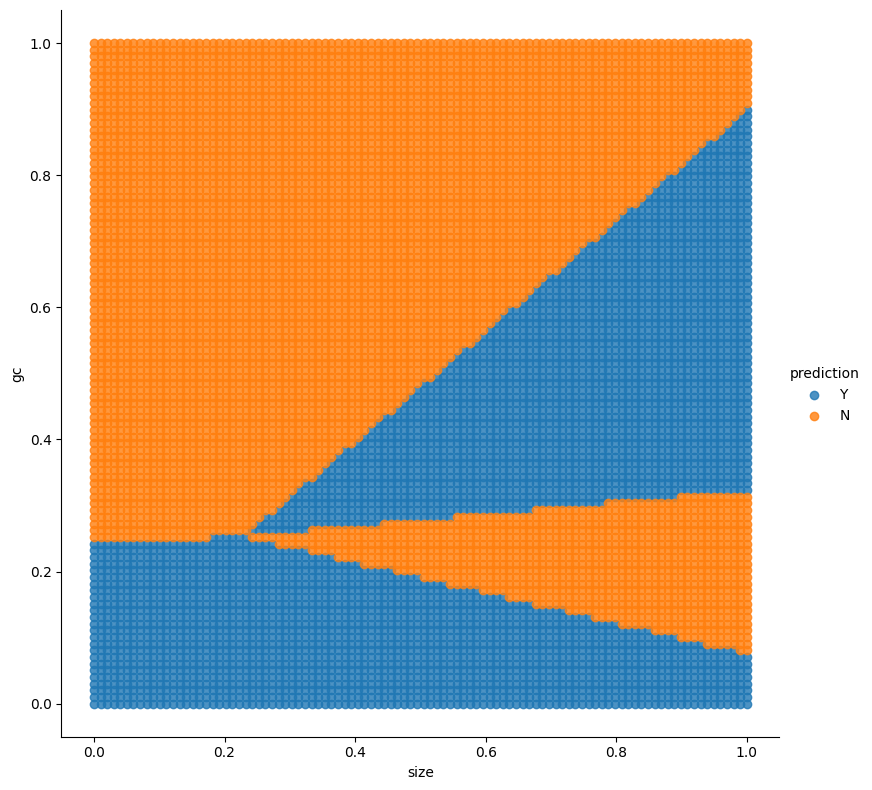

In [66]:
# we can visualize the behaviour by seeing how it would classify each point in a grid
import numpy as np

clf = neighbors.KNeighborsClassifier(10)
clf.fit(training_features, training_classes)

rows = []
for size in np.linspace(0, 1, 100):
    for gc in np.linspace(0, 1, 100):
        rows.append({'size' : size, 'gc' : gc, 'prediction' : clf.predict([[size, gc]])[0]})
        #print({'size' : size, 'gc' : gc, 'prediction' : clf.predict([[size, gc]])[0]})
mesh =pd.DataFrame(rows, columns=['size', 'gc', 'prediction'])

sns.lmplot(
data =mesh,
x='size',
y='gc',
hue='prediction',
height=8,
fit_reg=False)

In [68]:
# we have much more data

features = df[['Tb927.1.3230_T', 'Tb927.1.3230_C']]
classes  = df['Pleomorphic']

training_features, test_features, training_classes, test_classes = train_test_split(features, classes, test_size=0.2)

len(training_features), len(test_classes)

(66, 17)

In [69]:
# build and test the classifier
clf = neighbors.KNeighborsClassifier(10)
clf.fit(training_features, training_classes)

# much worse!
clf.score(test_features, test_classes)

0.8823529411764706

/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not 

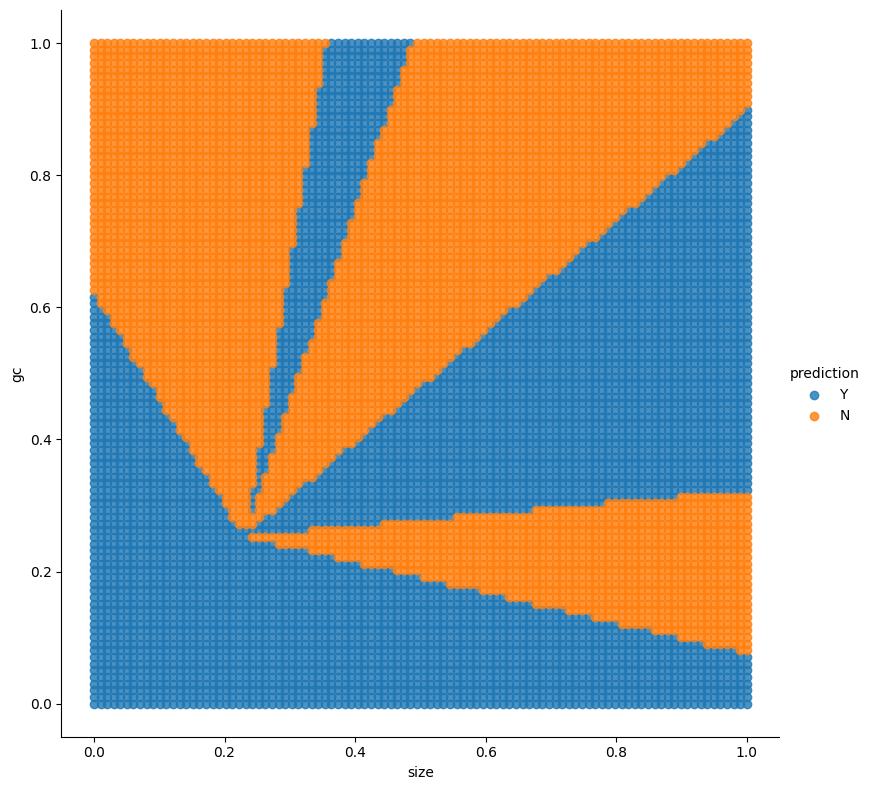

In [70]:
rows = []
for size in np.linspace(0, 1, 100):
    for gc in np.linspace(0, 1, 100):
        rows.append({'size' : size, 'gc' : gc, 'prediction' : clf.predict([[size, gc]])[0]})
        #print({'size' : size, 'gc' : gc, 'prediction' : clf.predict([[size, gc]])[0]})
mesh =pd.DataFrame(rows, columns=['size', 'gc', 'prediction'])

sns.lmplot(
data =mesh,
x='size',
y='gc',
hue='prediction',
height=8,
fit_reg=False)

In [71]:
# maybe we can do better with more/fewer neighbours

# what is the best value for k?

for k in range(1,20,2):
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(training_features, training_classes)
    print(k, clf.score(test_features, test_classes))

1 1.0
3 1.0
5 0.8823529411764706
7 0.8823529411764706
9 0.8823529411764706
11 0.7647058823529411
13 0.7647058823529411
15 0.7647058823529411
17 0.7647058823529411
19 0.7058823529411765


In [72]:
# problem: maybe this is specific to the random training set?
# see what happens if we repeat a bunch of times....
# lots of variation just due to random split
for _ in range(10):
    training_features, test_features, training_classes, test_classes = train_test_split(features, classes, test_size=0.2)
    clf = neighbors.KNeighborsClassifier(3)
    clf.fit(training_features, training_classes)
    print(clf.score(test_features, test_classes))

0.9411764705882353
0.8823529411764706
0.8823529411764706
0.8823529411764706
0.9411764705882353
0.8235294117647058
0.9411764705882353
0.8235294117647058
0.8823529411764706
0.8823529411764706


In [73]:
# the solution: cross-validation...

from sklearn.model_selection import cross_val_score
clf = neighbors.KNeighborsClassifier(10)
cross_val_score(clf, features, classes, cv=10)

array([1.        , 0.88888889, 0.88888889, 0.875     , 0.75      ,
       0.875     , 0.875     , 0.75      , 1.        , 1.        ])

In [74]:
# cross-validate for different values of k

for k in range(1,20):
    clf = neighbors.KNeighborsClassifier(k)
    print(k, cross_val_score(clf, features, classes, cv=10).mean())

1 0.9375
2 0.9
3 0.9
4 0.8638888888888889
5 0.9013888888888889
6 0.8902777777777778
7 0.8902777777777778
8 0.8777777777777779
9 0.8777777777777779
10 0.8902777777777778
11 0.8416666666666666
12 0.8527777777777779
13 0.8180555555555555
14 0.8180555555555555
15 0.8180555555555555
16 0.8055555555555556
17 0.8055555555555556
18 0.8055555555555556
19 0.8055555555555556


In [75]:
# maybe we can do better if we include another dimension
features = df[['Tb927.1.3230_T',	'Tb927.1.3230_C',	'Tb927.1.3230_A',	'Tb927.1.3230_G']]
classes  = df['Pleomorphic']

for k in range(1,20):
    clf = neighbors.KNeighborsClassifier(k)
    print(k, cross_val_score(clf, features, classes, cv=10).mean())

1 0.9625
2 0.9125
3 0.9125
4 0.9125
5 0.925
6 0.9375
7 0.9375
8 0.9375
9 0.95
10 0.9625
11 0.925
12 0.925
13 0.8902777777777778
14 0.8777777777777779
15 0.8777777777777779
16 0.8777777777777779
17 0.8777777777777779
18 0.8777777777777779
19 0.8777777777777779


In [77]:
# trying a different classifier is easy as they all share the same interface
from sklearn import tree


features = df[['Tb927.1.3230_T',	'Tb927.1.3230_C',	'Tb927.1.3230_A',	'Tb927.1.3230_G']]
classes  = df['Pleomorphic']

clf = tree.DecisionTreeClassifier()
cross_val_score(clf, features, classes, cv=10).mean()

np.float64(0.9402777777777779)

In [80]:
# build a classifier with the training data
clf = tree.DecisionTreeClassifier()
clf.fit(training_features, training_classes)

# use it to predict the classes of the test data
print(clf.predict(test_features))

clf.score(test_features, test_classes)

['N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N']


1.0

In [118]:
# especially for Carolien: random forrests

from sklearn.ensemble import RandomForestClassifier

features = df.iloc[:, 6:]  # Select every column from the 7th onwards (0-based index)
classes  = df['Pleomorphic']

clf = RandomForestClassifier()
cross_val_score(clf, features, classes, cv=10).mean()

np.float64(0.9875)

In [148]:
dna = ">Tb927.1.1010\nATGGACGGCAGTGAGTGCTTTCTCGTGACACCGACTCGGTGGGGGCTTATGCTAGAATACGAGCGTGAGGATGCTGTTGCTTTGCTGCGCCAGAAACTTGCTTTTTTCTCATCAGACAGTCTAACTTTGACTGAAAGGGAAGATGTACTTTTATCATCCGGTGCAGAGTCCTCGAAGACAGACTCACTGTTGATTTACGGGTCAGTAGCACTGGTTCGCAAGGAGGCATTTCTATGGTTTCTTAGAGTTATTAGGCTGACGCTCGTGGAGGATATGGCCTCACAGGTTGTCATTTGCCCGCAAGTAGGGGACGCCGTGCCAAATCTACTGCTACCTCCCTTATGGGAAACAGGACAAACGAAGAGCTTCCGCCGATGGAGCGTCGTTTACTGGGCAATGCGATGTGGAATTCTTCGGGGTATTAAAAAGCGGTATGAGCTGACACAATTATATTTGGATCAAATTGTGAGCATTGGAGCTGGTGGTGACGACTTTGACGTGCGCGAAGAGGAGGAGGCAGCATTTCTGCAGGAGAAGTTGTTCCACAATGCCCATCAGGAACTTCGAGAGAGTGTTTTGGAGGCGAAGAATGCGCCATTCGATATCTATCATAGCGCTTGTAATGAGGAAAGGATCAACCTCTCGTTTGTAGTCTCAAATGTACCCACACTCATCGTCGTTTGGGCCAGCTGGGATGGCGCCTCGCTTGATTGGCTGAGGAAGAACATCTTCAATCGGGAGGTCACTTGCAGTTGCGACCCCGTCCCGCGGCCAACTTTCGTCGCCGATCTGAAAATCAGGGATCCGTGGCTACGGGTCGTGAGGGAGTTTACTTCTATTCCCAATGGGGAAGCGAACCAGCCGGTTGAGGAAGTGTCGGGAATTGCCAAGTGTGCTCAGATAGTATTAATTAGTGTTGATGAAGAGCAAGGCGCAGCTGTCGGCTGCCTGAAGGGGTTGATAGATGGGATTGATGGATGGAAGAGTCCCATTGTCCCCCTAATGCCGCTGTGGAGTGGTCCAAAGGGTATGCTAAGTGAACTCTCATCTGCCCTTGGTTTCTCGAGGCTTCCGTACTTTATGGCCGTTCAAAATACCCGTGTTGAGACTGCGAAGGGGGATGCCAAGCAGTTTCCGCGCATCTGTTACGTTACTCCTAATGGGCAGGGGGAGGTCCCCCCAACCCAGTCATGTACTGAGGGTAATACTGCTGAACTTGGAGAGTGTGGGATGAACTCGCCAGATTGGCATCTTGTCGATAAGGGGGAACGTCAGCGCGTGACTGGTGAAATCGAGCGATTTTTATTATCCACTGATGCACCTTTGCGTTTCCACGCTCGTGTTGACAAAACATATCATTCTCTTGGGACGCCCACGTTGGCGTCATCAGAGTCCCACCAACCTGACGTATCGTCGTTTGTGTCCCTGTCAGGAACTATTTCTTCGCTTGATTTAGCGAAGCTAAAGAATGCGTTGCGCGTCTTTGCTGGTGTTCGGAACAGCGCCGTAAACCTAAATGTTATTAAGCCTTCGTGCCCGTTACTGGTTGAGCTGAACCCTGCTACTCCAACAAAATACATTCGGGGGGTGCAACGGTGTGTCACGTGTAGTGAATGTCACAAGGATATATTAATAGATAAGGAATACCACTTTAGATGCATTCAGTGTAGCCAGGTAAATGGAACTCTCTGCAAGATCTGCTTTGAGGGCGCCAAACATCCGGCCCACCACATACTACTGAGGATGAACGTCGAAACCCCAACAACGGTGGAGTTGCTTTGGGGCCCTTCAAATGTTGCACCATTGGAACTTTTTCGAGGAGTACTCGTGACGAACAAGAGGAACACACACATTGGTGTGTACTGCAATTTATGTGCCCAACTTGTGCGTGGCAGACGTTGGAAATGCGCCATGTGCTACGATTTCGACATATGTAATGGGTGTATCGAGGAAAATTGTATGAAGTTCAGCGATGCCGGCGAAGTGAGTTTTGTTGTTTCGGACGGCGTCGGACATGGCCAGAAGAATACTTTGTCGAGTTCTTACCATACAAAGGATCACATGTTTTTGTGCGTCCGTCACGCATGTGGCTCCGCTGGTGACGCATGTTTGAGGCCAGTAATGGAGCCGAATGCGGTAAAGCTTCTTCTGGAAGGATAG"

header, sequence = dna.split('\n', 1)
identifier = header[1:]
print(identifier)

sequence = sequence.upper()


# Check if the length of dna is divisible by 3
if len(sequence) % 3 != 0:
	raise ValueError("The length of the DNA sequence is not divisible by 3.")
elif not set(sequence).issubset({'A', 'C', 'G', 'T'}):  
	raise ValueError("The DNA sequence contains invalid characters.")
else:
	chunks = [sequence[i:i+3] for i in range(0, len(sequence), 3)]
	print(chunks)
	# Extract the string after the newline and save it as the value following '>'

# Initialize the dictionary to store counts for each position
counts = {'first': {'A': 0, 'T': 0, 'C': 0, 'G': 0},
          'second': {'A': 0, 'T': 0, 'C': 0, 'G': 0},
          'third': {'A': 0, 'T': 0, 'C': 0, 'G': 0}}

# Iterate over each chunk and count the letters at each position
for chunk in chunks:
    if len(chunk) >= 1 and chunk[0] in counts['first']:
        counts['first'][chunk[0]] += 1
    if len(chunk) >= 2 and chunk[1] in counts['second']:
        counts['second'][chunk[1]] += 1
    if len(chunk) >= 3 and chunk[2] in counts['third']:
        counts['third'][chunk[2]] += 1

# Divide counts by the number of chunks
num_chunks = len(chunks)
for position in counts:
    for nucleotide in counts[position]:
        counts[position][nucleotide] /= num_chunks

print(counts)
# Calculate the average value for 'A'
average_A = (counts['first']['A'] + counts['second']['A'] + counts['third']['A']) / 3
average_T = (counts['first']['T'] + counts['second']['T'] + counts['third']['T']) / 3
average_C = (counts['first']['C'] + counts['second']['C'] + counts['third']['C']) / 3
average_G = (counts['first']['G'] + counts['second']['G'] + counts['third']['G']) / 3
print(f"{identifier}_A {average_A} {identifier}_T {average_T} {identifier}_C {average_C} {identifier}_G {average_G}")

Tb927.1.1010
['ATG', 'GAC', 'GGC', 'AGT', 'GAG', 'TGC', 'TTT', 'CTC', 'GTG', 'ACA', 'CCG', 'ACT', 'CGG', 'TGG', 'GGG', 'CTT', 'ATG', 'CTA', 'GAA', 'TAC', 'GAG', 'CGT', 'GAG', 'GAT', 'GCT', 'GTT', 'GCT', 'TTG', 'CTG', 'CGC', 'CAG', 'AAA', 'CTT', 'GCT', 'TTT', 'TTC', 'TCA', 'TCA', 'GAC', 'AGT', 'CTA', 'ACT', 'TTG', 'ACT', 'GAA', 'AGG', 'GAA', 'GAT', 'GTA', 'CTT', 'TTA', 'TCA', 'TCC', 'GGT', 'GCA', 'GAG', 'TCC', 'TCG', 'AAG', 'ACA', 'GAC', 'TCA', 'CTG', 'TTG', 'ATT', 'TAC', 'GGG', 'TCA', 'GTA', 'GCA', 'CTG', 'GTT', 'CGC', 'AAG', 'GAG', 'GCA', 'TTT', 'CTA', 'TGG', 'TTT', 'CTT', 'AGA', 'GTT', 'ATT', 'AGG', 'CTG', 'ACG', 'CTC', 'GTG', 'GAG', 'GAT', 'ATG', 'GCC', 'TCA', 'CAG', 'GTT', 'GTC', 'ATT', 'TGC', 'CCG', 'CAA', 'GTA', 'GGG', 'GAC', 'GCC', 'GTG', 'CCA', 'AAT', 'CTA', 'CTG', 'CTA', 'CCT', 'CCC', 'TTA', 'TGG', 'GAA', 'ACA', 'GGA', 'CAA', 'ACG', 'AAG', 'AGC', 'TTC', 'CGC', 'CGA', 'TGG', 'AGC', 'GTC', 'GTT', 'TAC', 'TGG', 'GCA', 'ATG', 'CGA', 'TGT', 'GGA', 'ATT', 'CTT', 'CGG', 'GGT', 'ATT',

# Exercise: classifying contigs

The following code will load a file containing contigs from a *de novo* genome assembly of a tardigrade (remember the video?). For each we have length, GC, and coverage. The categories are whether the contig is of animal or bacterial origin (the bacteria are contaminants).

Build a KNN classifier that will use the length/gc/coverage info to predict whether new contigs are contaminents or not. What is the best value for K? What is the highest accuracy achieved?